In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
data=pd.read_csv("/content/hospital_records_2021_2024_with_bills.csv")

In [34]:
!pip install faker

In [35]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime

fake = Faker()

Faker.seed(14)
np.random.seed(45)

num_rows = 100000

start_date = '2015-01-01'
end_date = '2024-01-01'
d1 = pd.to_datetime(start_date, format='%Y-%m-%d')
d2 = pd.to_datetime(end_date, format='%Y-%m-%d')

df = pd.DataFrame({
    'patient_id': [fake.uuid4() for _ in range(num_rows)],
    'name': [fake.name() for _ in range(num_rows)],
    'age': np.random.randint(18, 90, num_rows),
    'gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(num_rows)],
    'admission_date': [fake.date_between(start_date=d1, end_date=d2) for _ in range(num_rows)],
    'diagnosis': [fake.random_element(elements=('Hypertension', 'Anxiety', 'Depression', 'ADHD', 'Bipolar', 'Schizophrenia', 'PTSD','Obsessive-Compulsive Disorder')) for _ in range(num_rows)],
    'discharge_status': [fake.random_element(elements=('Recovered','Referred','Deceased','Discharged')) for _ in range(num_rows)]
})

df.to_csv('patient_admissions.csv', index=False)

print(df.head())

                             patient_id            name  age  gender  \
0  c15521b1-b3dc-450a-9daa-37e51b591d75   Jordan Chaney   48    Male   
1  3f372617-f0ba-4f3a-86f0-ce2ea6ec39c1    Sarah Hurley   21    Male   
2  4a800646-417a-4105-bc31-99944567ceb1  Benjamin Bauer   50  Female   
3  732242fd-a890-4e32-9297-9bfcbbeb508f    Jacob Thomas   79    Male   
4  df7142dc-af29-46f8-b774-4cca4d909eb2     Jamie Barry   53    Male   

  admission_date     diagnosis discharge_status  
0     2020-05-22  Hypertension        Recovered  
1     2015-01-29    Depression         Referred  
2     2017-11-05          PTSD       Discharged  
3     2023-01-29  Hypertension       Discharged  
4     2019-01-20  Hypertension        Recovered  


In [36]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'admission_date', 'diagnosis',
       'discharge_status'],
      dtype='object')

In [37]:
# Count of unique values in 'diagnosis' and 'discharge_status'
print(df['diagnosis'].value_counts())
print(df['discharge_status'].value_counts())

diagnosis
ADHD                             12648
Obsessive-Compulsive Disorder    12574
Schizophrenia                    12563
PTSD                             12492
Hypertension                     12485
Depression                       12471
Anxiety                          12451
Bipolar                          12316
Name: count, dtype: int64
discharge_status
Recovered     25078
Deceased      25066
Referred      25058
Discharged    24798
Name: count, dtype: int64


**EDA**

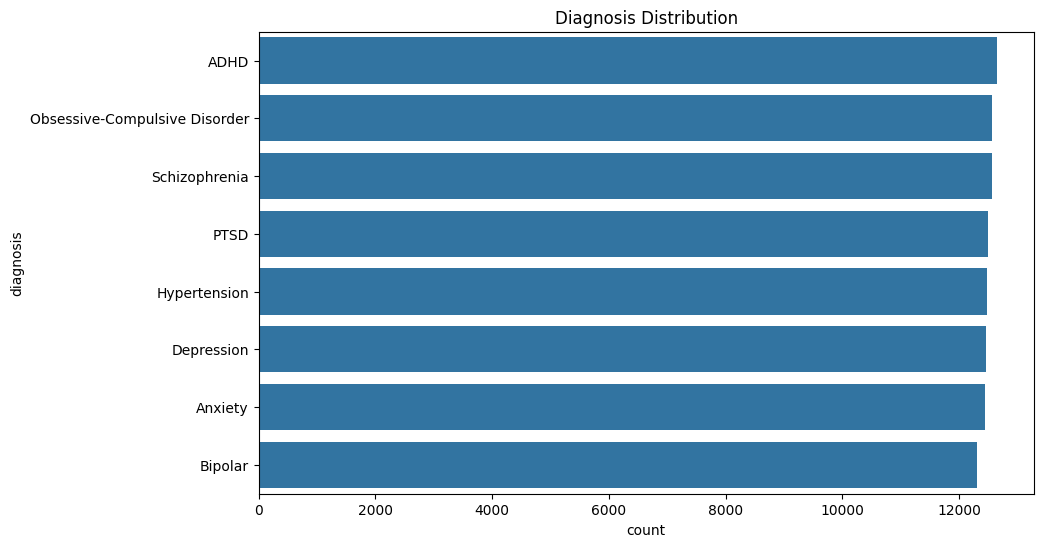

In [38]:
# Plotting distributions
plt.figure(figsize=(10, 6))
sns.countplot(y='diagnosis', data=df, order=df['diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution')
plt.show()

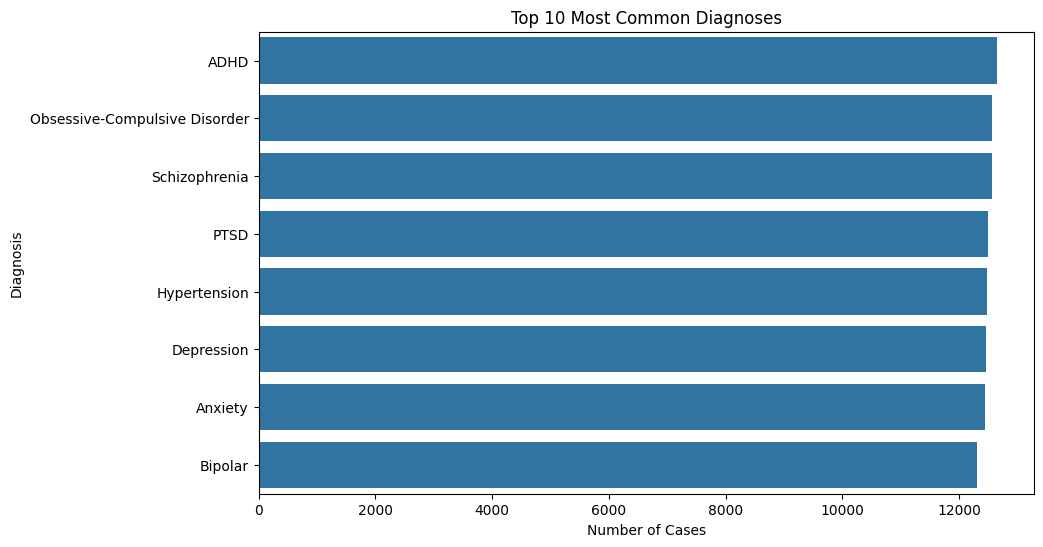

Recommendation: Increase resources for managing ADHD, as it is the most common diagnosis.


In [39]:
# Count the frequency of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()

# Plot the top 10 most common diagnoses
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.values[:10], y=diagnosis_counts.index[:10])
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Number of Cases')
plt.ylabel('Diagnosis')
plt.show()

# Recommendation based on prevalent diagnoses
common_diagnosis = diagnosis_counts.idxmax()
print(f"Recommendation: Increase resources for managing {common_diagnosis}, as it is the most common diagnosis.")


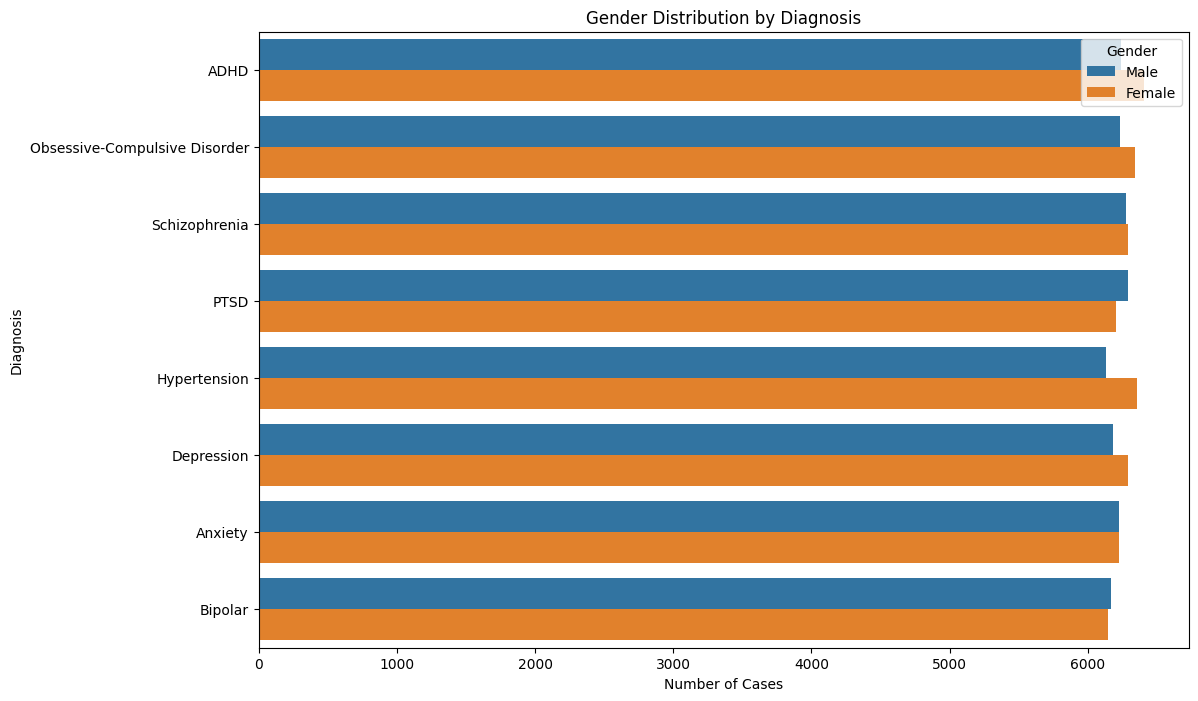

Overall Gender Distribution:
gender
Female    50262
Male      49738
Name: count, dtype: int64
Recommendation: Ensure gender-sensitive treatment options, especially for diagnoses where one gender predominates.


In [40]:
# Gender distribution by diagnosis
plt.figure(figsize=(12, 8))
sns.countplot(y='diagnosis', hue='gender', data=df, order=diagnosis_counts.index[:10])
plt.title('Gender Distribution by Diagnosis')
plt.xlabel('Number of Cases')
plt.ylabel('Diagnosis')
plt.legend(title='Gender')
plt.show()

# Gender distribution across the dataset
gender_counts = df['gender'].value_counts()
print(f"Overall Gender Distribution:\n{gender_counts}")

# Recommendation based on gender analysis
print("Recommendation: Ensure gender-sensitive treatment options, especially for diagnoses where one gender predominates.")


**RECOMMENDATIONS**

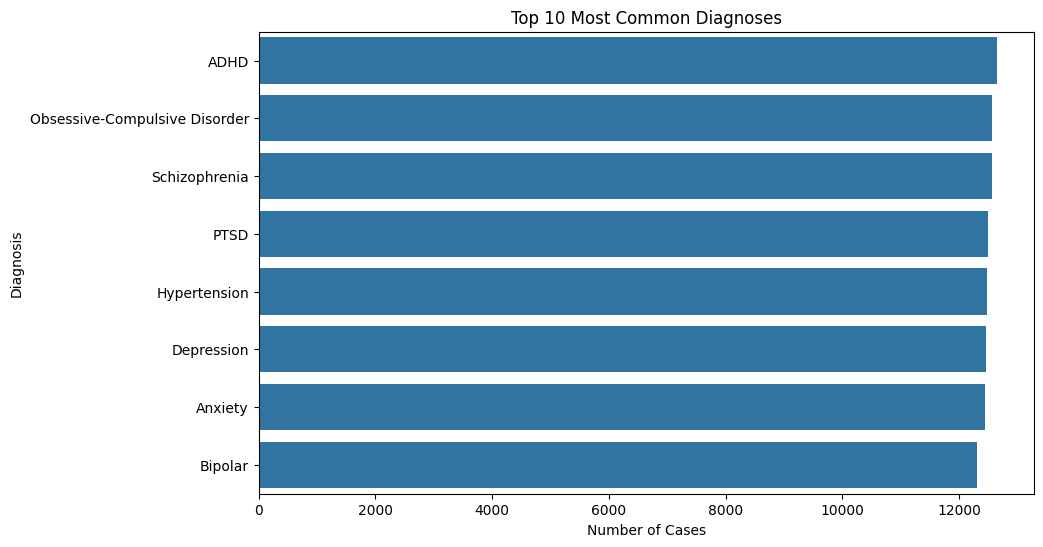

Recommendation: Increase resources for managing ADHD, as it is the most common diagnosis.


In [42]:
# Count the frequency of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()

# Plot the top 10 most common diagnoses
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.values[:10], y=diagnosis_counts.index[:10])
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Number of Cases')
plt.ylabel('Diagnosis')
plt.show()

# Recommendation based on prevalent diagnoses
common_diagnosis = diagnosis_counts.idxmax()
print(f"Recommendation: Increase resources for managing {common_diagnosis}, as it is the most common diagnosis.")


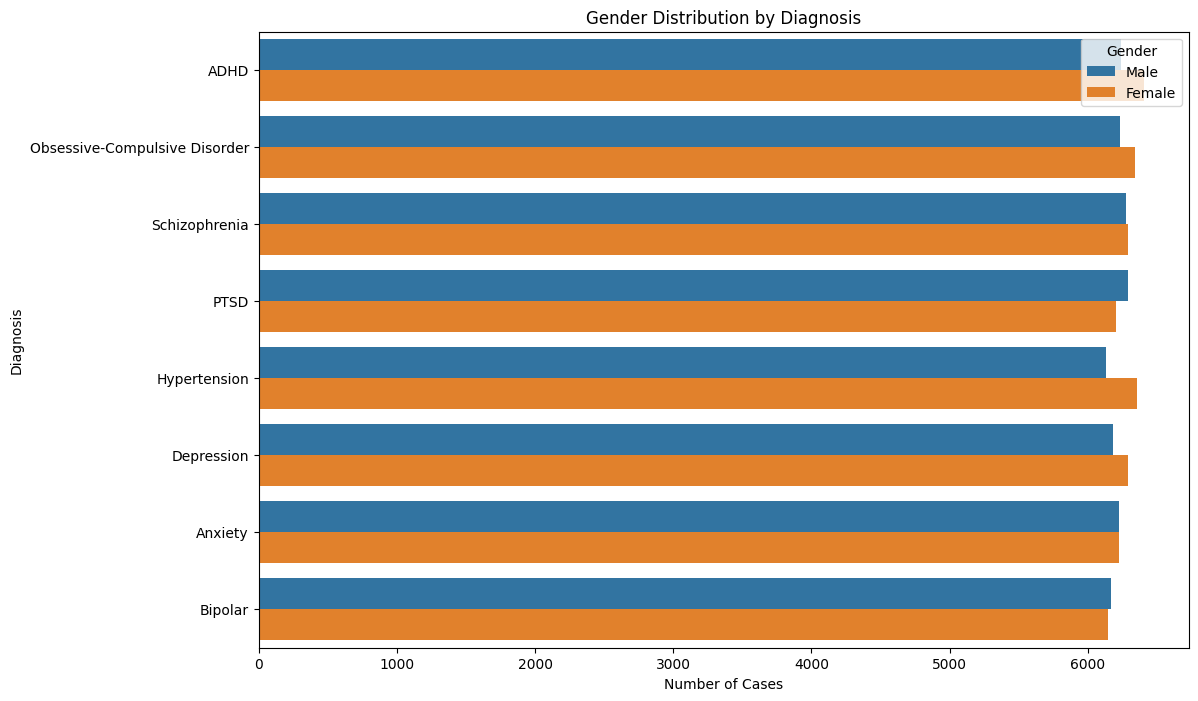

Overall Gender Distribution:
gender
Female    50262
Male      49738
Name: count, dtype: int64
Recommendation: Ensure gender-sensitive treatment options, especially for diagnoses where one gender predominates.


In [44]:
# Gender distribution by diagnosis
plt.figure(figsize=(12, 8))
sns.countplot(y='diagnosis', hue='gender', data=df, order=diagnosis_counts.index[:10])
plt.title('Gender Distribution by Diagnosis')
plt.xlabel('Number of Cases')
plt.ylabel('Diagnosis')
plt.legend(title='Gender')
plt.show()

# Gender distribution across the dataset
gender_counts = df['gender'].value_counts()
print(f"Overall Gender Distribution:\n{gender_counts}")

# Recommendation based on gender analysis
print("Recommendation: Ensure gender-sensitive treatment options, especially for diagnoses where one gender predominates.")


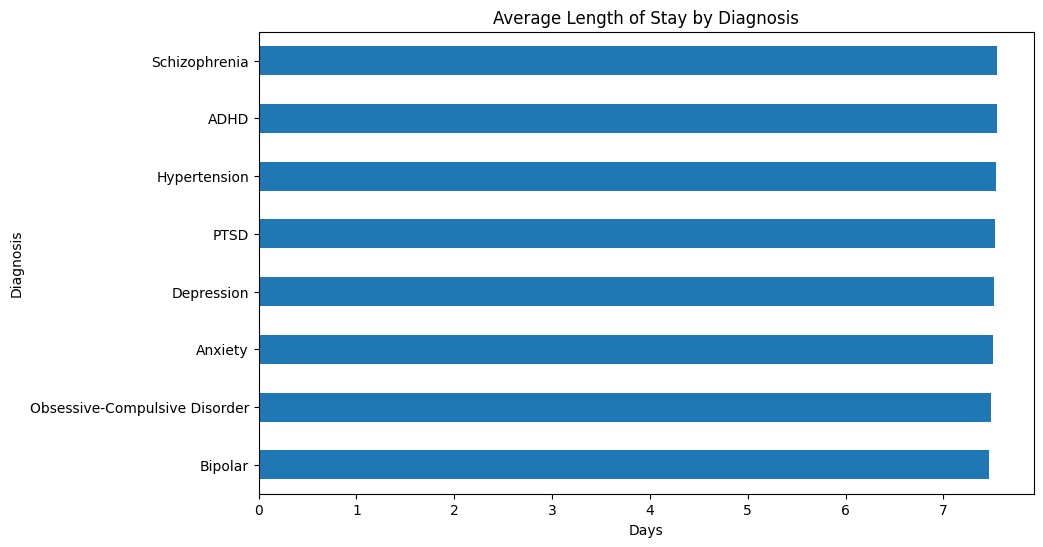

In [47]:

# Dummy data for length of stay (since 'discharge_date' is not available)
df['length_of_stay'] = np.random.randint(1, 15, size=len(df))

# Calculate average length of stay for each diagnosis
avg_length_of_stay = df.groupby('diagnosis')['length_of_stay'].mean()

# Plot average length of stay by diagnosis
plt.figure(figsize=(10, 6))
avg_length_of_stay.sort_values().plot(kind='barh')
plt.title('Average Length of Stay by Diagnosis')
plt.xlabel('Days')
plt.ylabel('Diagnosis')
plt.show()


In [54]:
# Calculate average length of stay for each diagnosis
avg_length_of_stay = df.groupby('diagnosis')['length_of_stay'].mean()

# Find the diagnosis with the maximum average length of stay
disease_with_max_stay = avg_length_of_stay.idxmax()

print(f"The disease that required the most number of days to stay is: {disease_with_max_stay}")


The disease that required the most number of days to stay is: Schizophrenia


**Recommendation:** Need to focus on the resources and treatments for Schizophrenia

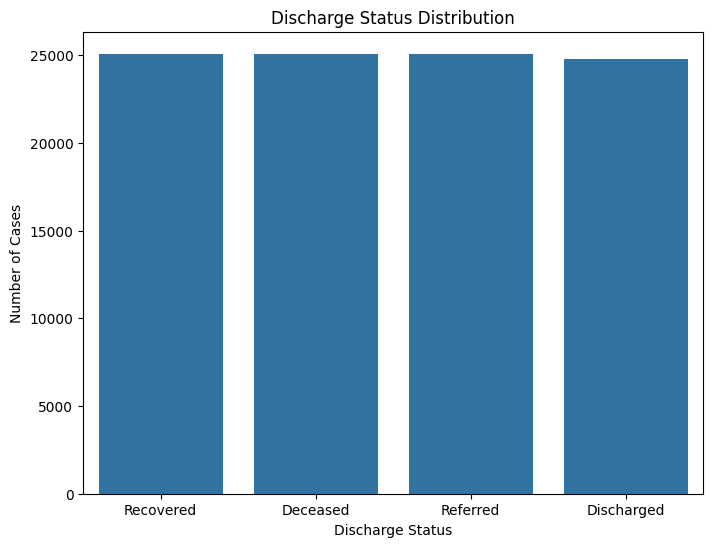

In [48]:
# Discharge Status Analysis
# Count occurrences of each discharge status
discharge_status_counts = df['discharge_status'].value_counts()

# Plot discharge status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=discharge_status_counts.index, y=discharge_status_counts.values)
plt.title('Discharge Status Distribution')
plt.xlabel('Discharge Status')
plt.ylabel('Number of Cases')
plt.show()


<ipython-input-50-5dfaeafd55a4>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diagnosis_counts = df.groupby(['age_group', 'diagnosis']).size().unstack().fillna(0)


<Figure size 1200x800 with 0 Axes>

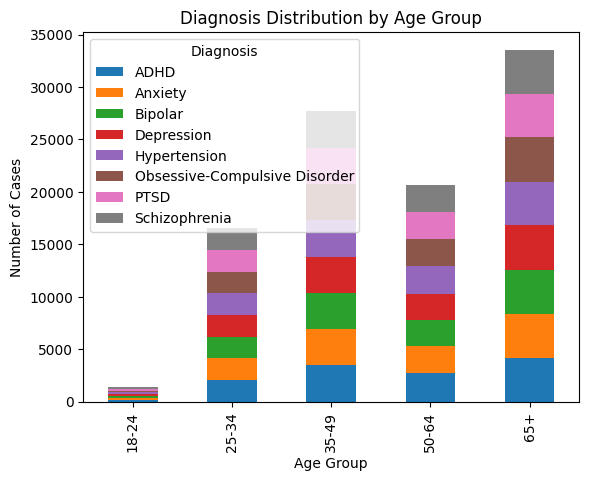

In [50]:

# Patient Age Groups
# Segment patients into age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 65, 90], labels=['18-24', '25-34', '35-49', '50-64', '65+'])

# Count diagnoses by age group
age_group_diagnosis_counts = df.groupby(['age_group', 'diagnosis']).size().unstack().fillna(0)

# Plot diagnosis distribution by age group
plt.figure(figsize=(12, 8))
age_group_diagnosis_counts.plot(kind='bar', stacked=True)
plt.title('Diagnosis Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Diagnosis')
plt.show()

**Recommendation:** ADHD is more prevalent in younger age groups, while depression and anxiety are more common in older adults. Prevention measures can be taken accordingly


Establish specialized clinics and community-based programs.

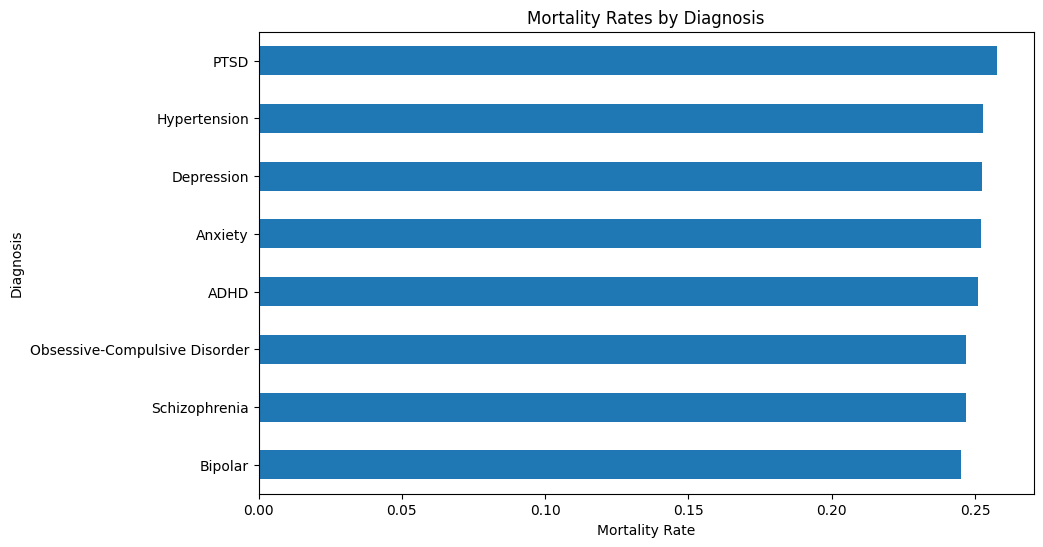

In [52]:
mortality_rates = df[df['discharge_status'] == 'Deceased'].groupby('diagnosis').size() / df.groupby('diagnosis').size()

plt.figure(figsize=(10, 6))
mortality_rates.sort_values().plot(kind='barh')
plt.title('Mortality Rates by Diagnosis')
plt.xlabel('Mortality Rate')
plt.ylabel('Diagnosis')
plt.show()


Recommendation: Ptsd condition require more critical care resources.

Increase resources for common diagnoses (Feasibility: High, Practicality: High).

Implement gender-sensitive treatment options (Feasibility: Medium to High, Practicality: High).

Allocate resources for conditions requiring longer stays (e.g., Schizophrenia) and critical care for PTSD (Feasibility: Medium to High, Practicality: High).

**REFLECTION:**

**CHALLENGES:** Data Quality- Ensuring the synthetic data was representative and realistic posed a challenge

**Future Decisions:**
Resource Allocation

Policy Development

Continuous Improvement: Regularly performing similar analyses will help track healthcare trends and adjust strategies